# TALLER EVALUATIVO 2 CORTE
Nombre: Nicolas Javier Carreño Perea Cod: 2253404

## Librerias y dataset

In [58]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense

Se separa el dataset de imagenes en un conjunto de entrenamiento y otro de prueba. Fashion-MNIST es un conjunto de datos de imágenes de artículos de Zalando que consta de un conjunto de entrenamiento de 60.000 ejemplos y un conjunto de prueba de 10.000 ejemplos. Cada ejemplo es una imagen en escala de grises de 28x28, asociada a una etiqueta de 10 clases.

In [57]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

Visualizamos algunas imagenes del dataset

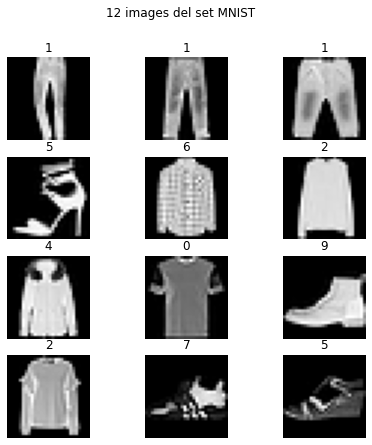

In [3]:
imagenes = np.random.randint(0,x_train.shape[0],12)
plt.figure(figsize=(7,7))
for i in range(len(imagenes)):
    img = x_train [imagenes[i],:,:]
    plt.subplot(4,3,i+1)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title(y_train[imagenes[i]])
plt.suptitle('12 images del set MNIST')
plt.show()

## Tratamiento y normalizacion de dataset

In [59]:
#Normalizar los datos:
X_train = x_train/255.0
X_test = x_test/255.0

In [60]:
nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

In [61]:
print(X_train.shape)

(60000, 28, 28)


In [62]:
#Indicar que solo se usara escala de grises
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

## Entrenamiento

Se construyo una red neuronal convolucional de 2 capas con 10 filtros en la capa de entrada y 20 filtros en la siguiente, ya que la ropa al tener mayor variedad de pixeles, es necesario obtener mayor profundidad para obtener mas caracteristicas. De tal forma que con ayuda de 4 capas ocultas de 120 y 100 neuronas, en teoria deberia mejorar esta precision.

In [63]:
#Build the Neural network model
modelo = Sequential()
modelo.add(Conv2D(filters=10,kernel_size=(5,5),activation='relu',input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Conv2D(filters=20, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

#Flatten the network to make it a vector and create the neural network with 2 hidden layers
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(100,activation='relu'))
modelo.add(Dense(nclasses,activation='sigmoid'))

Cabe resaltar que se probo utilizando la activacion de las capas ocultas a traves de Softmax, y a pesar de que el rendimiento era aceptable, no fue tan bueno como con Sigmoid.

In [30]:
modelo.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 4, 4, 20)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 320)               0         
                                                                 
 dense_18 (Dense)            (None, 120)              

Se utilizo un total de 12 Epochs y se aumento el batch_size, ya que mientras mas bajo sea, peor sera la precision del modelo. Asi mismo al principio, se opto por utilizar el optimizador adam en vez del SGD, pero al aumentar el numero de capas ocultas resultaba mejor dejar el optimizador SGD.

In [64]:
#Compilar el modelo
#modelo.compile(tf.keras.optimizers.SGD(0.2),loss='categorical_crossentropy',metrics=['accuracy'])
modelo.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
modeloEntrenado = modelo.fit(X_train,Y_train,epochs=12,batch_size=256,verbose=2,validation_data=(X_test,Y_test))

Epoch 1/12
235/235 - 10s - loss: 0.2040 - accuracy: 0.9254 - val_loss: 0.2747 - val_accuracy: 0.9021 - 10s/epoch - 44ms/step
Epoch 2/12
235/235 - 10s - loss: 0.2000 - accuracy: 0.9275 - val_loss: 0.2755 - val_accuracy: 0.9018 - 10s/epoch - 44ms/step
Epoch 3/12
235/235 - 9s - loss: 0.1985 - accuracy: 0.9275 - val_loss: 0.2748 - val_accuracy: 0.9026 - 9s/epoch - 39ms/step
Epoch 4/12
235/235 - 10s - loss: 0.1976 - accuracy: 0.9286 - val_loss: 0.2761 - val_accuracy: 0.9021 - 10s/epoch - 41ms/step
Epoch 5/12
235/235 - 9s - loss: 0.1964 - accuracy: 0.9287 - val_loss: 0.2704 - val_accuracy: 0.9048 - 9s/epoch - 39ms/step
Epoch 6/12
235/235 - 9s - loss: 0.1957 - accuracy: 0.9292 - val_loss: 0.2805 - val_accuracy: 0.9008 - 9s/epoch - 39ms/step
Epoch 7/12
235/235 - 9s - loss: 0.1954 - accuracy: 0.9288 - val_loss: 0.2812 - val_accuracy: 0.9007 - 9s/epoch - 40ms/step
Epoch 8/12
235/235 - 9s - loss: 0.1939 - accuracy: 0.9295 - val_loss: 0.2734 - val_accuracy: 0.9016 - 9s/epoch - 39ms/step
Epoch 9/12

In [36]:
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 90.3%


## Resultados

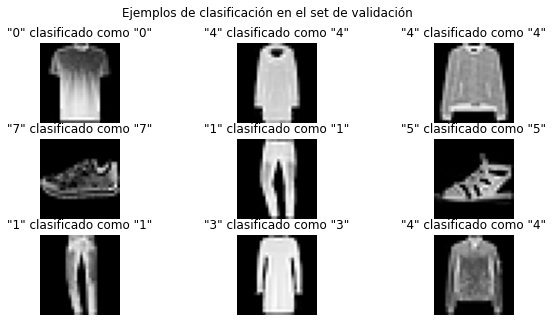

In [37]:
Y_pred = modelo.predict(X_test)
classes_y=np.argmax(Y_pred,axis=1)

plt.figure(figsize=(10,5))
imagenes = np.random.randint(0,X_test.shape[0],9)
for i in range(len(imagenes)):
	idx = imagenes[i]
	img = X_test[idx,:].reshape(28,28)
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = classes_y[idx]

	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
plt.suptitle('Ejemplos de clasificación en el set de validación')
plt.show()

Graficos de rendimiento de Perdida/Precision vs Iteraciones

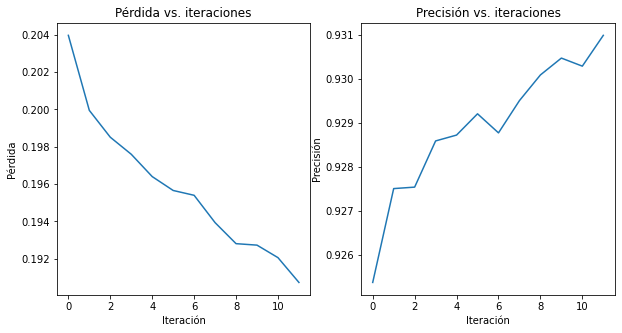

In [38]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(modeloEntrenado.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

plt.subplot(1,2,2)
plt.plot(modeloEntrenado.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

Matriz de confusion

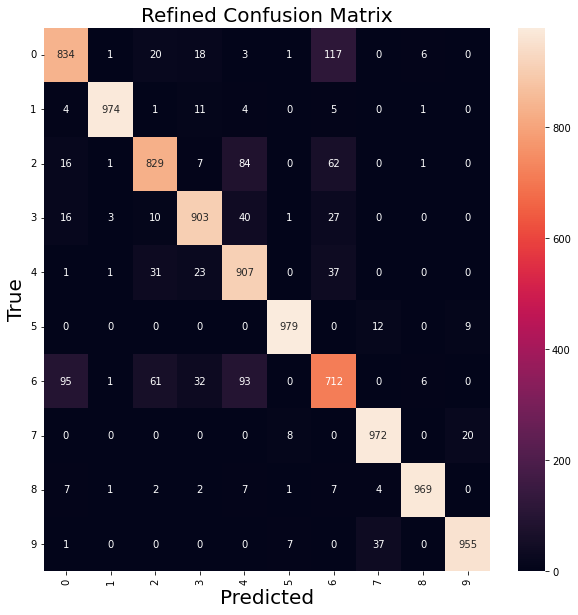

In [71]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

class_names = ['0','1','2','3','4','5','6','7','8','9']
y_true=np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, classes_y)

# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

plt.show()

## Conclusiones finales

Cada ejemplo de entrenamiento y de prueba esta asignado a una de las siguientes categorias:

* 0 Camiseta/Top
* 1 Pantalones
* 2 Jersey
* 3 Vestido
* 4 Abrigo
* 5 Sandalia
* 6 Camisa
* 7 Tenis
* 8 Bolso
* 9 Botin

De acuerdo a los resultados del entrenamiento y segun la matriz de correlacion, encontramos que la red neuronal se confunde al momento de clasificar camisas, ya que suele reconocerlas como camisetas y viceversa, y tambien de manera notoria a los abrigos.

Sin embargo, el modelo presenta una alta varianza, esto se conoce como la varianza del algoritmo de aprendizaje automático. Este concepto se encuentra en el contexto de la compensación entre sesgo y varianza. El algoritmo es más sensible a los datos específicos utilizados durante el entrenamiento, es decir que este depende demasiado de las imagenes con las cuales entrena para obtener un buen resultado.

En conclusion, y debido a esta caracteristica de las RN, la mejor precision obtenida fue de 90.3%.